# Displaying data in a Correlation map

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

data = pd.read_csv('clean_data.csv')

data.head(5)

,Timestamp,Gender,GPA,Prev_grade,Faculty,Spending_monthly,Scholarship,partying_during_week,classes_miss_for_alcohol,exams_failed,dating,parents_allow_alcohol,relationship_with_parents
0,2024-03-07 17:12:01,Female,76.0,2nd Year,Arts & Social Sciences,R 4001- R 5000,No,Only weekends,3,0,Yes,Yes,Very close
1,2024-03-07 17:12:08,Male,89.0,2nd Year,Economic & Management Sciences,R 7001 - R 8000,"Yes (NSFAS, etc...)",Only weekends,4+,0,No,Yes,Very close
2,2024-03-07 17:12:25,Male,76.0,1st Year,AgriSciences,R 4001- R 5000,No,2,3,0,No,Yes,Very close
3,2024-03-07 17:12:28,Male,89.0,2nd Year,Engineering,R 6001 - R 7000,No,3,2,0,Yes,Yes,Very close
4,2024-03-07 17:13:00,Female,74.0,2nd Year,Arts & Social Sciences,R 4001- R 5000,No,Only weekends,1,3,No,Yes,Fair


Not needed for Corr map

In [8]:
data.drop(['Timestamp', 'Faculty'], axis=1, inplace=True)

# Converting string values to numeric using label encoding

In [9]:
data['Gender'] = data['Gender'].replace({
    'Female':0,
    'Male':1
})

data['Prev_grade'] = data['Prev_grade'].replace({
    'Postgraduate': 0,
    '1st Year': 1,
    '2nd Year': 2,
    '3rd Year': 3,
    '4th Year': 4
})


data['Spending_monthly'] = data['Spending_monthly'].replace({
    'R 4001- R 5000':0,
    'R 5001 - R 6000':1,
    'R 6001 - R 7000':2,
    'R 7001 - R 8000':3,
    'R 8000+':4
})

data['Scholarship'] = data['Scholarship'].replace({
    'No':0,
    'Yes (NSFAS, etc...)':1
})

data['partying_during_week'] = data['partying_during_week'].replace({
    'Only weekends':2,
    '4+':4
})

data['classes_miss_for_alcohol'] = data['classes_miss_for_alcohol'].replace({
    '4+':4
})

data['exams_failed'] = data['exams_failed'].replace({
    '4+':4
})

data['dating'] = data['dating'].replace({
    'No':0,
    'Yes':1
})

data['parents_allow_alcohol'] = data['parents_allow_alcohol'].replace({
    'No':0,
    'Yes':1
})

data['relationship_with_parents'] = data['relationship_with_parents'].replace({
    'Distant':0,
    'Fair': 1,
    'Close': 2,
    'Very close': 3
})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     399 non-null    object 
 1   GPA                        399 non-null    float64
 2   Prev_grade                 399 non-null    object 
 3   Spending_monthly           399 non-null    object 
 4   Scholarship                399 non-null    object 
 5   partying_during_week       399 non-null    object 
 6   classes_miss_for_alcohol   399 non-null    object 
 7   exams_failed               399 non-null    object 
 8   dating                     399 non-null    object 
 9   parents_allow_alcohol      399 non-null    object 
 10  relationship_with_parents  399 non-null    object 
dtypes: float64(1), object(10)
memory usage: 34.4+ KB


Converting columns to the integer type

In [11]:
data['partying_during_week'] = data['partying_during_week'].astype(int)
data['classes_miss_for_alcohol'] = data['classes_miss_for_alcohol'].astype(int)
data['exams_failed'] = data['exams_failed'].astype(int)
data['relationship_with_parents'] = data['relationship_with_parents'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     399 non-null    object 
 1   GPA                        399 non-null    float64
 2   Prev_grade                 399 non-null    object 
 3   Spending_monthly           399 non-null    object 
 4   Scholarship                399 non-null    object 
 5   partying_during_week       399 non-null    int64  
 6   classes_miss_for_alcohol   399 non-null    int64  
 7   exams_failed               399 non-null    int64  
 8   dating                     399 non-null    object 
 9   parents_allow_alcohol      399 non-null    object 
 10  relationship_with_parents  399 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 34.4+ KB


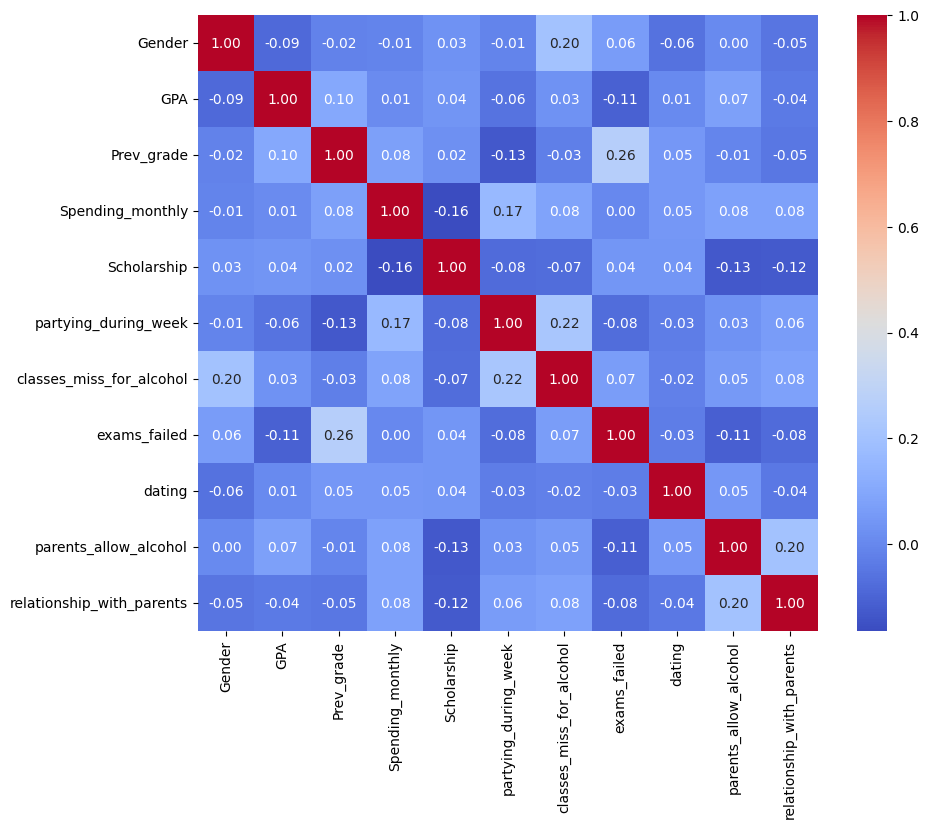

In [12]:
corr = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.show()